First few rows of the dataset:
   Order   File_Type  SKU_number  SoldFlag  SoldCount MarketingType  \
0      2  Historical     1737127       0.0        0.0             D   
1      3  Historical     3255963       0.0        0.0             D   
2      4  Historical      612701       0.0        0.0             D   
3      6  Historical      115883       1.0        1.0             D   
4      7  Historical      863939       1.0        1.0             D   

   ReleaseNumber  New_Release_Flag  StrengthFactor  PriceReg  ReleaseYear  \
0             15                 1        682743.0     44.99         2015   
1              7                 1       1016014.0     24.81         2005   
2              0                 0        340464.0     46.00         2013   
3              4                 1        334011.0    100.00         2006   
4              2                 1       1287938.0    121.95         2010   

   ItemCount  LowUserPrice  LowNetPrice  
0          8         28.97        31.

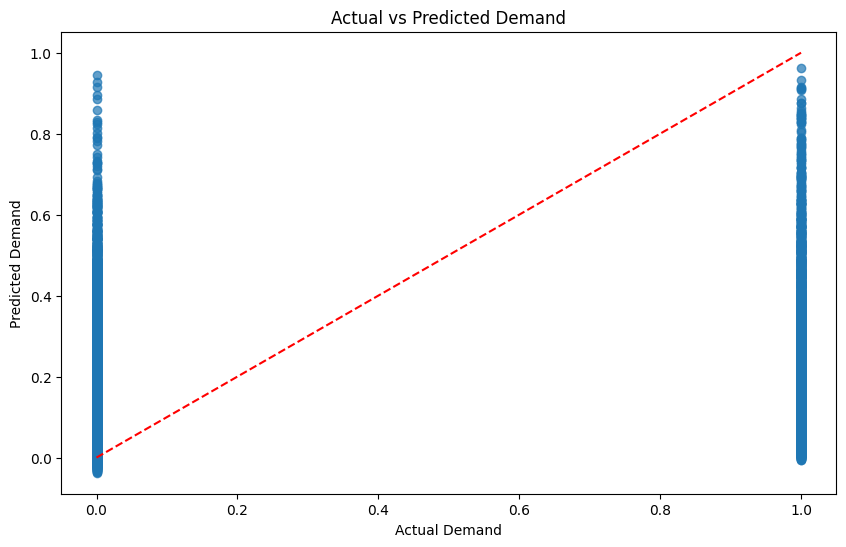

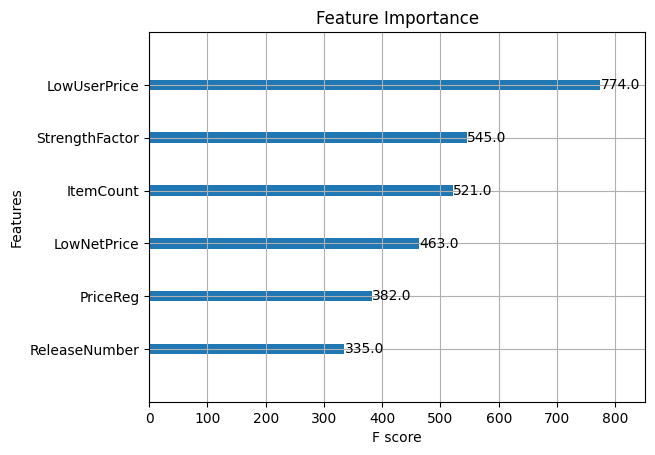


Optimal Inventory Levels:
        SKU_number  PredictedDemand  OptimalReorderPoint
0          1737127         0.018967             0.022761
1          3255963         0.060075             0.072090
2           612701         0.074289             0.089146
3           115883         0.148427             0.178113
4           863939         0.005479             0.006575
...            ...              ...                  ...
198912      109683         0.009867             0.011840
198913      416462         0.005070             0.006083
198914      658242         0.009412             0.011294
198915     2538340         0.012567             0.015080
198916      416662         0.013756             0.016508

[198917 rows x 3 columns]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv('/content/SalesKaggle3.csv')

# Displays the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Data preprocessing
# Filling missing values and convert data types
df.fillna(0, inplace=True)

# Converts ReleaseYear to numeric, handling non-numeric gracefully
df['ReleaseYear'] = pd.to_numeric(df['ReleaseYear'], errors='coerce')
df.dropna(subset=['ReleaseYear'], inplace=True)

# Feature selection
# Defined features for the model
features = ['ReleaseNumber', 'StrengthFactor', 'PriceReg', 'ItemCount', 'LowUserPrice', 'LowNetPrice']
target = 'SoldFlag'  # Assuming SoldFlag is the indicator for demand

X = df[features]
y = df[target]

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trained an XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predicted on the test set
y_pred = model.predict(X_test)

# Evaluated the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"\nRoot Mean Squared Error (RMSE) of the model: {rmse:.2f}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Actual vs Predicted Demand')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

# Feature importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Inventory optimization strategy
# Calculate optimal reorder points or stock levels based on predicted demand
predicted_demand = model.predict(X)
optimal_inventory = df.copy()
optimal_inventory['PredictedDemand'] = predicted_demand
optimal_inventory['OptimalReorderPoint'] = optimal_inventory['PredictedDemand'] * 1.2  # Example strategy

print("\nOptimal Inventory Levels:")
print(optimal_inventory[['SKU_number', 'PredictedDemand', 'OptimalReorderPoint']])


First few rows of the dataset:
   Order   File_Type  SKU_number  SoldFlag  SoldCount MarketingType  \
0      2  Historical     1737127       0.0        0.0             D   
1      3  Historical     3255963       0.0        0.0             D   
2      4  Historical      612701       0.0        0.0             D   
3      6  Historical      115883       1.0        1.0             D   
4      7  Historical      863939       1.0        1.0             D   

   ReleaseNumber  New_Release_Flag  StrengthFactor  PriceReg  ReleaseYear  \
0             15                 1        682743.0     44.99         2015   
1              7                 1       1016014.0     24.81         2005   
2              0                 0        340464.0     46.00         2013   
3              4                 1        334011.0    100.00         2006   
4              2                 1       1287938.0    121.95         2010   

   ItemCount  LowUserPrice  LowNetPrice  
0          8         28.97        31.

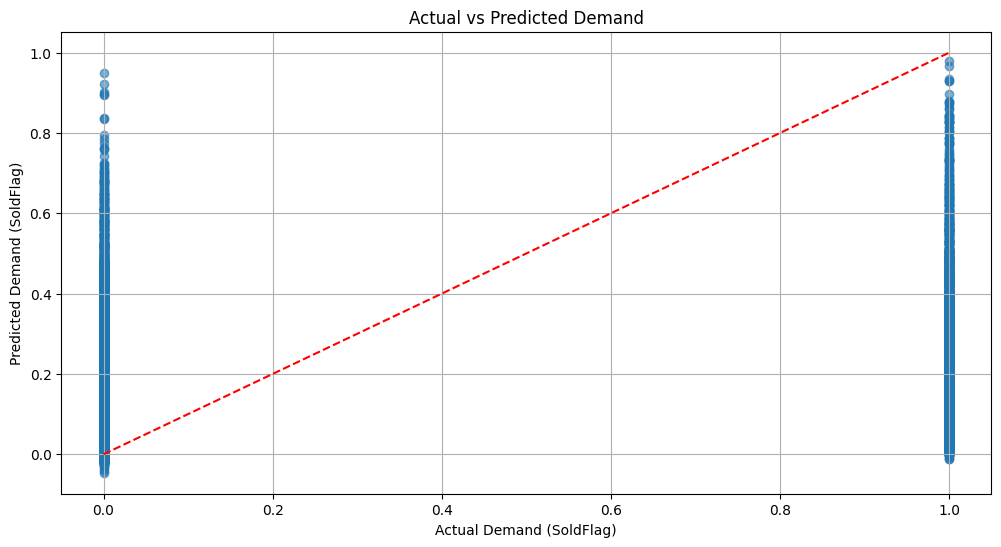

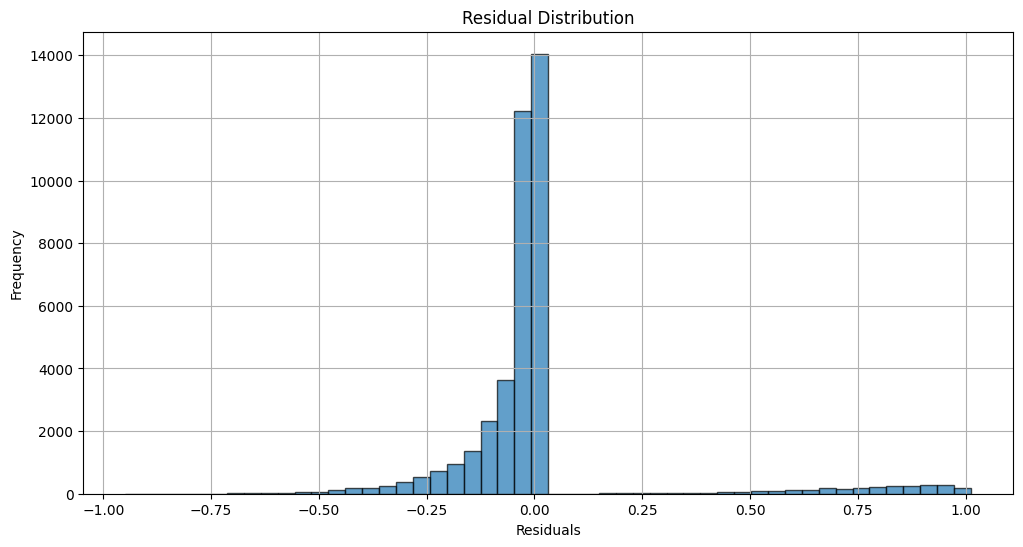

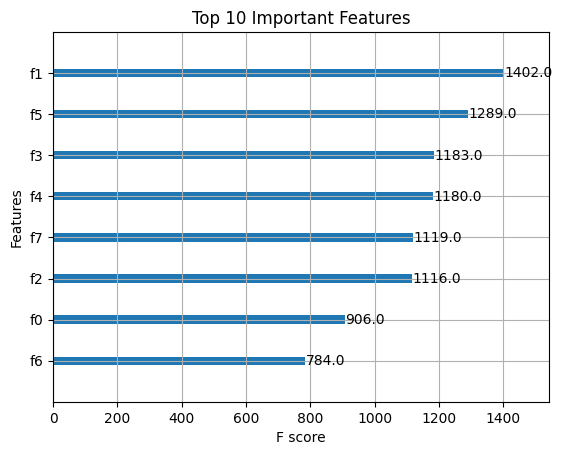


Optimal Inventory Levels:
   SKU_number  PredictedDemand  SafetyStock  OptimalReorderPoint
0     1737127         0.016114     0.140971             0.157085
1     3255963         0.089266     0.140971             0.230237
2      612701         0.055823     0.140971             0.196794
3      115883         0.130055     0.140971             0.271026
4      863939         0.005495     0.140971             0.146466
5      214948         0.231212     0.140971             0.372183
6      484059         0.143714     0.140971             0.284684
7      146401         0.292629     0.140971             0.433600
8      110568         0.161756     0.140971             0.302727
9      764270         0.061296     0.140971             0.202266

Optimal inventory levels saved to 'OptimalInventoryLevels.csv'.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/SalesKaggle3.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Basic data information
print("\nData Information:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Data Preprocessing
# Fill missing values with 0 and handle non-numeric data in 'ReleaseYear'
df.fillna(0, inplace=True)
df['ReleaseYear'] = pd.to_numeric(df['ReleaseYear'], errors='coerce')
df.dropna(subset=['ReleaseYear'], inplace=True)

# Feature Engineering
# Calculate 'ProductAge' based on the current year
current_year = pd.Timestamp.now().year
df['ProductAge'] = current_year - df['ReleaseYear']

# Calculate 'PriceSensitivity' as a ratio of user price to regular price
df['PriceSensitivity'] = np.where(df['PriceReg'] != 0, df['LowUserPrice'] / df['PriceReg'], 0)

# Updated Feature Selection
features = ['ReleaseNumber', 'StrengthFactor', 'PriceReg', 'ItemCount',
            'LowUserPrice', 'LowNetPrice', 'ProductAge', 'PriceSensitivity']
target = 'SoldFlag'  # Assuming 'SoldFlag' represents demand

# Check for missing features
missing_features = [col for col in features if col not in df.columns]
if missing_features:
    print(f"Missing features detected and removed: {missing_features}")
    features = [col for col in features if col in df.columns]

# Standardize the features for better model performance
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost Model
model = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=150,
                         learning_rate=0.05,
                         max_depth=6,
                         subsample=0.8,
                         colsample_bytree=0.8,
                         random_state=42)

model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualization of Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title('Actual vs Predicted Demand')
plt.xlabel('Actual Demand (SoldFlag)')
plt.ylabel('Predicted Demand (SoldFlag)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.grid()
plt.show()

# Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=50, edgecolor='black', alpha=0.7)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Feature Importance Plot
xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.title('Top 10 Important Features')
plt.show()

# Inventory Optimization Strategy
# Predicted demand for all data
predicted_demand = model.predict(scaler.transform(df[features]))

# Calculate Optimal Reorder Point using a Safety Stock strategy
# Safety Stock = z * σ(demand)
# z = 1.28 for 90% service level, std_dev_demand = standard deviation of predicted demand
std_dev_demand = np.std(predicted_demand)
service_level = 1.28
df['PredictedDemand'] = predicted_demand
df['SafetyStock'] = service_level * std_dev_demand
df['OptimalReorderPoint'] = df['PredictedDemand'] + df['SafetyStock']

# Display Optimal Inventory Levels
optimal_inventory = df[['SKU_number', 'PredictedDemand', 'SafetyStock', 'OptimalReorderPoint']]
print("\nOptimal Inventory Levels:")
print(optimal_inventory.head(10))

# Save the results to a CSV file
optimal_inventory.to_csv('/content/OptimalInventoryLevels.csv', index=False)
print("\nOptimal inventory levels saved to 'OptimalInventoryLevels.csv'.")
